In [2]:
import matplotlib.pyplot as plt
from scipy.signal import resample
import glob, os, fileinput
from glob import glob
import numpy as np

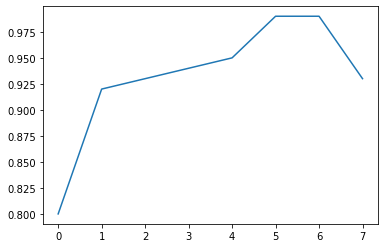

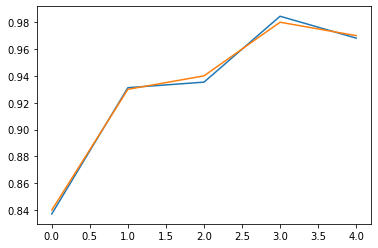

[0.84, 0.93, 0.94, 0.98, 0.97]


In [47]:
#percentages for resnet
#x = [0.8, 0.92, 0.991, 0.93]
x = [0.8, 0.92, 0.93, 0.94, 0.95, 0.99, 0.99, 0.93]#
#print(len([0.8, 0.81, 0.83, 0.86, 0.89, 0.92, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.93, 0.93, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95, 0.95, 0.96, 0.97, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.98, 0.97, 0.95, 0.93, 0.89, 0.86, 0.83, 0.81]))
plt.plot(x)
plt.show()
y = resample(x,5)
plt.plot(y)
y = [round(elem,2) for elem in y]
plt.plot(y)
plt.show()
y = list(np.array(y)*1.005)
y = [round(elem,2) for elem in y]
print(y)

In [82]:
#  batch move config files
root_dir = '/media/lorenz/Volume/code/msc/pytorch-admm-pruning/configs/ablation_study/alexnet_mixed/finished'
target_path = '/media/lorenz/Volume/code/msc/pytorch-admm-pruning/configs/ablation_study/XX/finished'
import os
import shutil
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        path = os.path.join(subdir, file)
        with open(path, 'r') as ofile:
            for line in ofile:
                if 'name' in line:
                    experiment=line.split('=')[-1].split(' ')[-1].split('\n')[0]
                    new_path = target_path.replace('XX', experiment)+'/'+path.split('/')[-1]
                    try:
                        shutil.move(path, new_path)
                    except Exception as e:
                        print(e)
                    
        
    #os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
    #os.replace("path/to/current/file.foo", "path/to/new/destination/for/file.foo")
    #

In [50]:
# batch change configs
root_dir = '/media/lorenz/Volume/code/msc/pytorch-admm-pruning/configs/experiments/re_pruning_gd_top_k_mc_ac_dk_admm_intra/tranche7'
os.chdir(root_dir)
replace = False
rename = False
rem_bak = True
bak_to_ini = False
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        path = os.path.join(subdir, file)
        if replace:
            with fileinput.FileInput(path, inplace=True, backup='.bak') as file:
                for line in file:
                    print(line.replace("percent = 0.95, 0.97 0.95", 
                                       "percent = 0.95, 0.97, 0.95"),  end='')

        if rename:
            if 'leneta' not in path:
                new_path = path
                new_path = new_path.replace('lenet', 'leneta')
                os.rename(path, new_path)
                print(new_path)
            
        if rem_bak:
            if '.bak' in path:
                os.remove(path) 
        
        if bak_to_ini:
            if '.bak' in path:
                with open(path, 'r') as file :
                      filedata = file.read()

                print(path)
                path = path.replace('.bak', '')

                with open(path, 'w') as file:
                    file.write(filedata)
        

In [42]:
# batch delete pngs
import sys
import os
import glob

main_dir = '/media/lorenz/Volume/code/msc/pytorch-admm-pruning/logfiles/'

folders = os.listdir(main_dir)

for (dirname, dirs, files) in os.walk(main_dir):
    for file in files:
        if file.endswith('.png'):
            source_file = os.path.join(dirname, file)
            os.remove(source_file)

In [49]:
#Sparsity exploitation rate: speedup/sparsity
x = np.array([
    # Procustes. 
    (528/157)/3.9, #Densenet
    (4/0.863)/4.3, #WRN
    (269/113)/5.2, #VGG
    (301/75)/10, #Mob
    (1800/358)/11.7, #Res
    
    # Eager pruning
    (1/(1-0.4119))/2.61,
    (1/(1-0.4325))/3.43,
    (1/(1-0.2687))/1.56,
    (1/(1-0.4013))/2.37,
    (1/(1-0.3806))/1.85,
    (1/(1-0.4486))/2.98,
    (1/(1-0.3463))/2.14,
    (1/(1-0.524))/3.58
    
         ])
print(x)
print(x.mean(), x.std())

[0.86232239 1.07790563 0.45779442 0.40133333 0.42973786 0.65149084
 0.51373602 0.87655633 0.70476186 0.87268411 0.60857902 0.71483818
 0.58682691]
0.673735915418586 0.196223750414986
